In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/210220/210220.csv


In [2]:
# importing libraries and magic functions

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

## Feature Selection *<a name="paragraph2"></a>*

## Test - Train Split <a name="paragraph3"></a>

#选择10个特征，构建预测模型#

In [3]:
# clarify what is y and what is x label
df2 = pd.read_csv('/kaggle/input/210220/210220.csv')

In [4]:
df2.columns

Index(['gender', 'hypertension', 'diabete', 'smokecurrent', 'hpgrade',
       'chestpain', 'age', 'cho', 'hdl', 'ldl', 'crge', 'sbp', 'height', 'nep',
       'ly', 'mo', 'mcvfl', 'glu', 'bun', 'ua', 'ckmb', 'fib', 'dd', 'lccaimt',
       'lccact', 'lccach', 'rccach', 'max_ccach', 'max_ccacl', 'ps', 'rccaimt',
       'lccacl', 'rccact', 'rccacl', 'avr_imt', 'aip', 'Scorer', 'Framinghamr',
       'target'],
      dtype='object')

In [5]:
df2.shape

(1232, 39)

In [6]:
# Dropping columns education and glucose
df = df2.drop(['age', 'cho', 'hdl', 'ldl', 'crge', 'sbp', 'height', 'nep',
       'ly', 'mo', 'mcvfl', 'glu', 'bun', 'ua', 'ckmb', 'fib', 'dd', 'lccaimt',
       'lccact', 'lccach',   'rccaimt',
       'lccacl', 'rccact', 'rccacl', 'avr_imt', 'aip', 'Scorer', 'Framinghamr'], axis=1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
feat=['diabete',
 'max_ccacl',
 'ps',
 'chestpain',
 'max_ccach',
 'rccach',
 'hypertension',
 'hpgrade',
 'gender',
 'smokecurrent']
df[feat] = scal.fit_transform(df[feat])
df.head()

,gender,hypertension,diabete,smokecurrent,hpgrade,chestpain,rccach,max_ccach,max_ccacl,ps,target
0,0.0,1.0,0.0,0.0,1.000000,1.0,0.141509,0.141509,0.097257,0.076923,0
1,1.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.160377,0.104738,0.087179,0
2,0.0,0.0,0.0,0.0,0.166667,0.0,0.000000,0.000000,0.000000,0.000000,0
3,0.0,1.0,0.0,0.0,1.000000,0.0,0.235849,0.235849,0.573566,0.364103,0
4,1.0,0.0,0.0,1.0,0.000000,0.0,0.179245,0.179245,0.154613,0.174359,0


In [8]:
df.columns

Index(['gender', 'hypertension', 'diabete', 'smokecurrent', 'hpgrade',
       'chestpain', 'rccach', 'max_ccach', 'max_ccacl', 'ps', 'target'],
      dtype='object')

In [9]:
df.shape

(1232, 11)

In [10]:
target_name = 'target'
data_target = df[target_name]
data = df.drop([target_name], axis=1)

In [11]:
y=data_target

X=data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=420)

In [13]:
len(X_train)
len(X_test)

825

407

## Resampling imbalanced Dataset <a name="paragraph4"></a>

Class 0: 577
Class 1: 655
Proportion: 0.88 : 1


Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease\n')

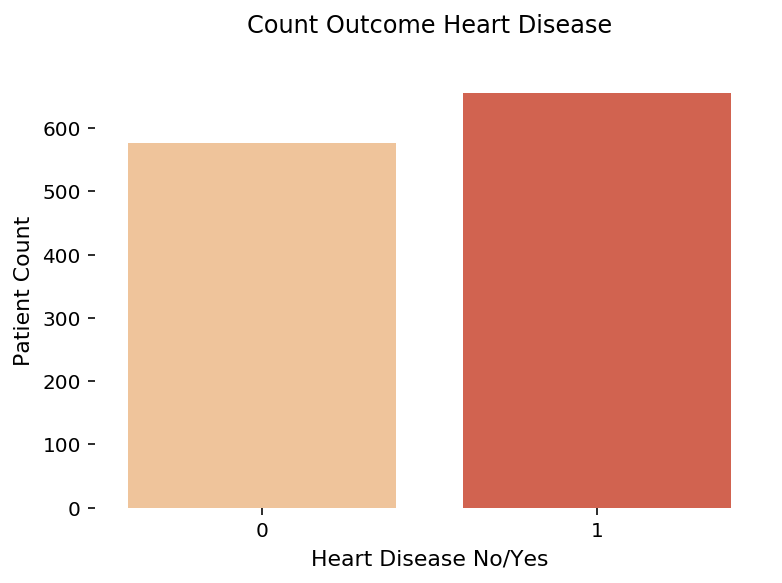

In [14]:
# Checking balance of outcome variable
target_count = df.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df.target, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

### UNDERSAMPLING METHOD

Undersampling aims to decrease the number of instances from the overrepresented class in the data set. In our case, these techniques will decrease the number of fraudulent transactions in our data to approximately 50:50. If we do not balance the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like your algorithm is achieving superb results when, in reality, it is simply always predicting the majority class.

The easiest way to do so is to randomly select observations from the majority class and remove them from the data set until we achieve a balance between the majority and minority class.


In [15]:
# Shuffle df
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['target'] == 1]

In [16]:
#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['target'] == 0].sample(n=577,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

1    655
0    577
Name: target, dtype: int64

Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease after Resampling\n')

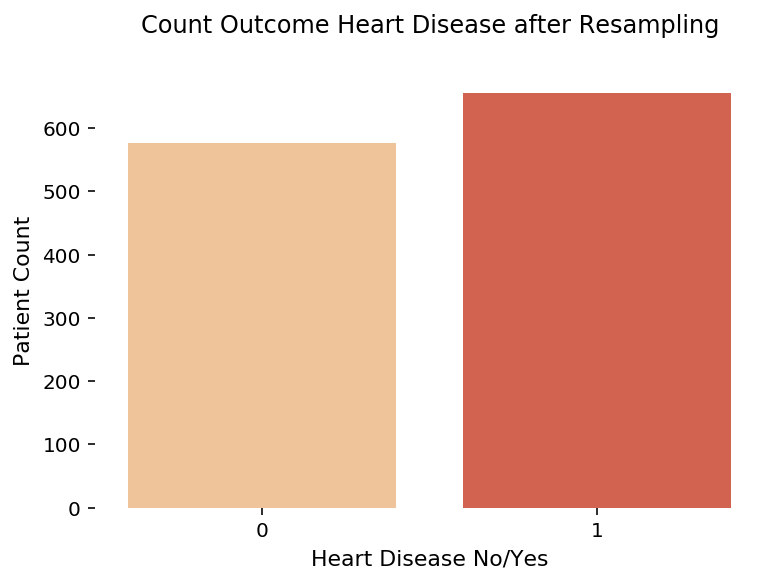

In [17]:
# check new class counts
normalized_df.target.value_counts()

# plot new count
sns.countplot(normalized_df.target, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

**模型第一部分**

> ## **Model Pipeline** <a name="paragraph5"></a>

In [18]:
y_train = normalized_df['target']
X_train = normalized_df.drop('target', axis=1)

from sklearn.pipeline import Pipeline

classifiers = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(2)]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

The accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is: 71.50%


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('classifier',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

The accuracy score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) is: 71.25%


Pipeline(memory=None,
         steps=[('classifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)

The accuracy score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') is: 90.91%


Pipeline(memory=None,
         steps=[('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=2, p=2,
                                      weights='uniform'))],
         verbose=False)

The accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform') is: 80.84%


# ##第二部分 Modelling & Evaluation (without Pipeline) <a name="paragraph6"></a>

### 1. Logistic Regression

In [19]:
# logistic regression again with the balanced dataset

normalized_df_reg = LogisticRegression().fit(X_train, y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")


The accuracy score for LogReg is: 71.5%
The f1 score for LogReg is: 73.3%
The precision score for LogReg is: 74.0%
The recall score for LogReg is: 72.6%


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 2. Decision Tree 决策树

In [20]:
# Decision Tree

#initialize model
dtc= DecisionTreeClassifier()

# fit model
dtc.fit(X_train, y_train)

score_dtc = dtc.predict(X_test)
# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, score_dtc)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, score_dtc)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, score_dtc)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, score_dtc)
print(f"The recall score for DTC is: {round(recall,3)*100}%")

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

The accuracy score for DTC is: 90.9%
The f1 score for DTC is: 91.2%
The precision score for DTC is: 95.5%
The recall score for DTC is: 87.2%


In [21]:
dtc.fit(X_train,y_train)
# plotting(y_test,dtc.predict_proba(X_test))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# 第三部分模型评估

In [22]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.ensemble import StackingClassifier Need to update sklearn to use inbuilt stacking classifier
from sklearn.ensemble import VotingClassifier

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [24]:
def CrossVal(dataX,dataY,mode,cv=3):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring='accuracy')
    return(np.mean(score))

def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

# **KNN**

Accuracy is :  0.7305114847264976


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

Text(0.5, 1.0, 'F1 Score = 0.7761194029850746')

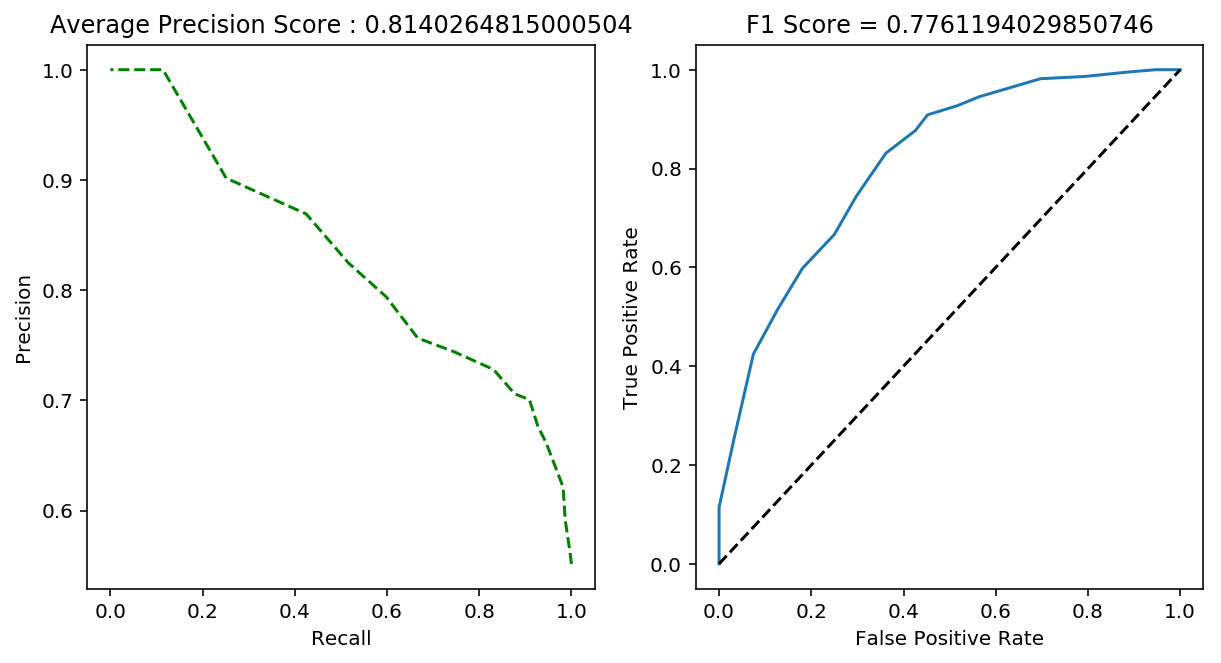

In [25]:
k=KNeighborsClassifier(algorithm='auto',n_neighbors= 19)
score_k=CrossVal(X_train,y_train,k)
print("Accuracy is : ",score_k)
k.fit(X_train,y_train)
plotting(y_test,k.predict_proba(X_test))

k_f1=f1_score(y_test,k.predict(X_test))
plt.title('F1 Score = {}'.format(k_f1))

# LOGISTIC REGRESSION

Accuracy is :  0.7085997316283842


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=1e-10, verbose=0,
                   warm_start=False)

Text(0.5, 1.0, 'F1 Score = 0.7053140096618358')

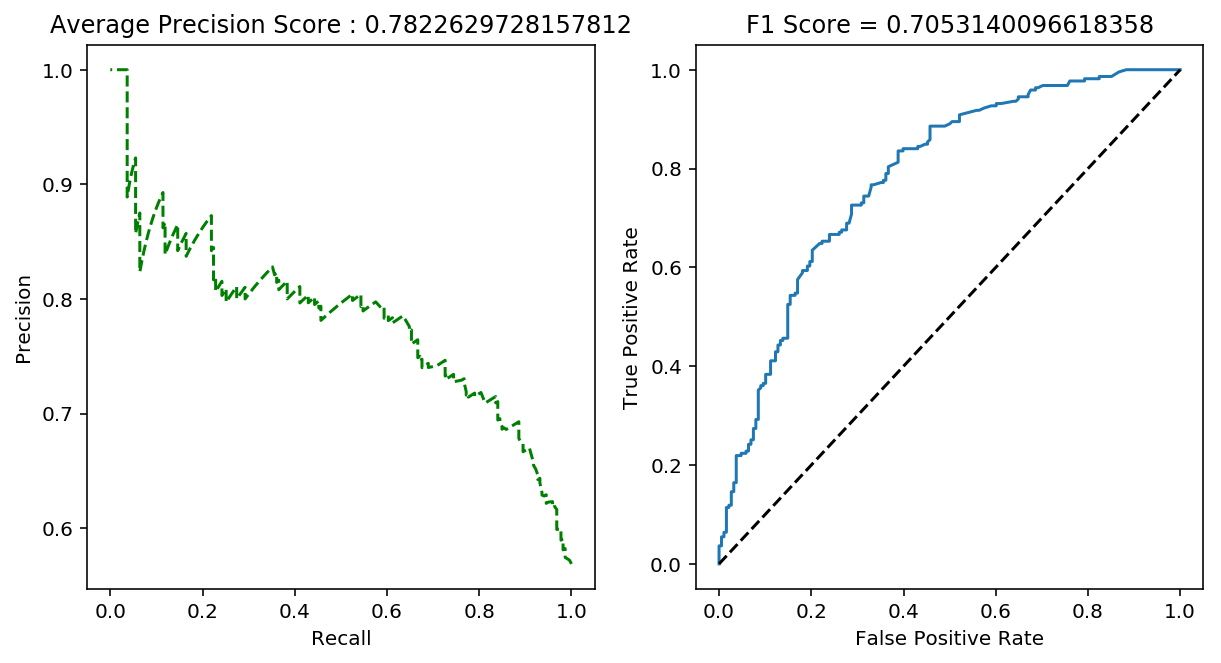

In [26]:
lr=LogisticRegression(class_weight='balanced', tol=1e-10)
score_lr=CrossVal(X_train,y_train,lr)
print("Accuracy is : ",score_lr)
lr.fit(X_train,y_train)
plotting(y_test,lr.predict_proba(X_test))

lr_f1=f1_score(y_test,lr.predict(X_test))
plt.title('F1 Score = {}'.format(lr_f1))

# Support vector machine

Accuracy is :  0.7085602652143027


SVC(C=0.4, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.851, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Text(0.5, 1.0, 'F1 Score = 0.755939524838013')

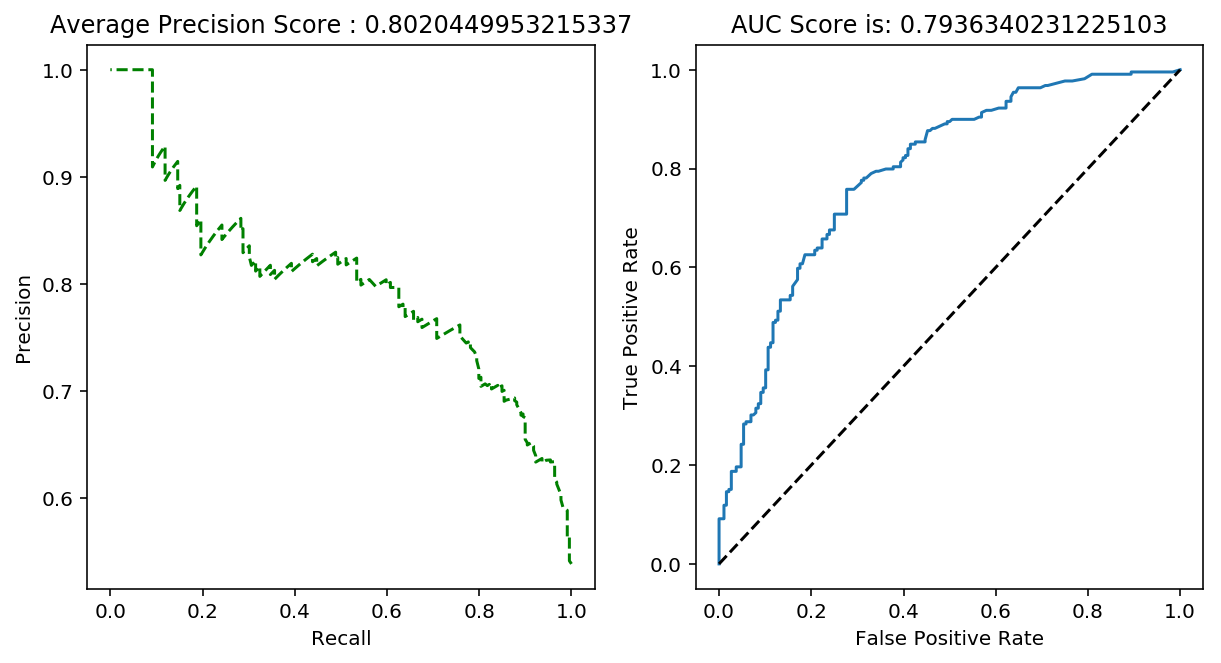

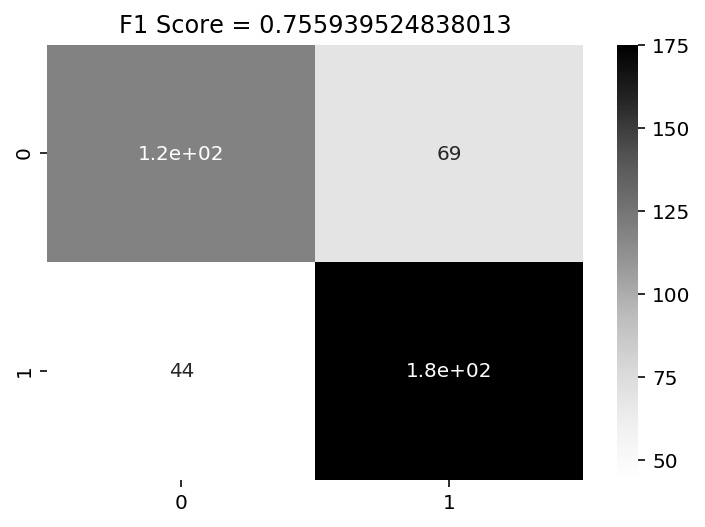

In [27]:
svc=SVC(C=0.4,probability=True,kernel='rbf',gamma=0.851)
score_svc=CrossVal(X_train,y_train,svc)
print("Accuracy is : ",score_svc)
svc.fit(X_train,y_train)
plotting(y_test,svc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,svc.predict(X_test)), annot= True, cmap='Greys')
svc_f1=f1_score(y_test,svc.predict(X_test))
plt.title('F1 Score = {}'.format(svc_f1))


# ** Random Forest Classifier**

Accuracy is: 0.7345488988870471


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=420, verbose=0,
                       warm_start=False)

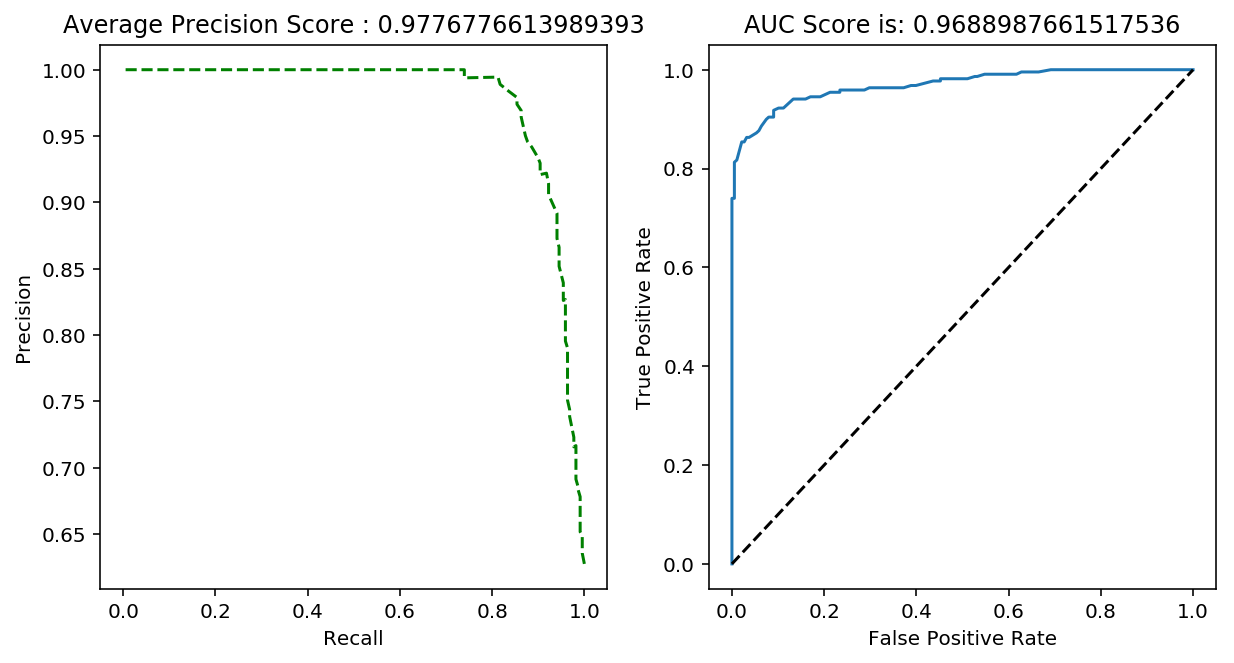

In [28]:
rf=RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=420)
score_rf= CrossVal(X_train,y_train,rf)
print('Accuracy is:',score_rf)
rf.fit(X_train,y_train)
plotting(y_test,rf.predict_proba(X_test))


# Extra Trees Classifier

Accuracy is: 0.7288578419764781


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=342, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

Text(0.5, 1.0, 'F1 Score = 0.9116945107398569')

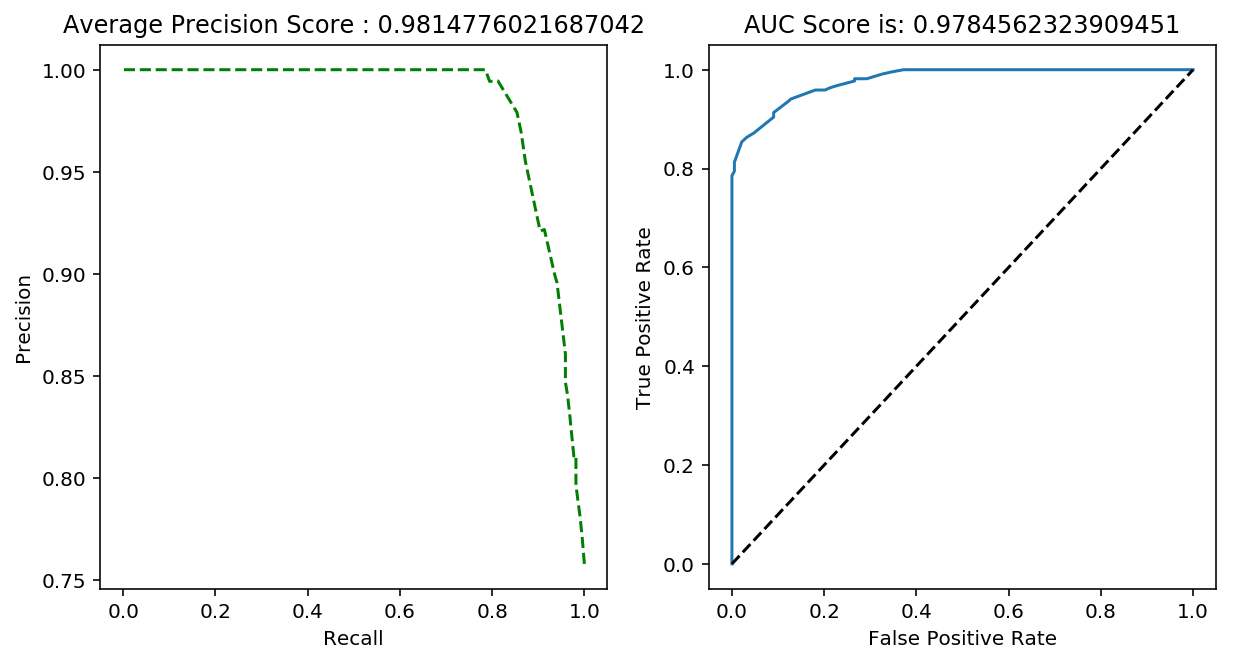

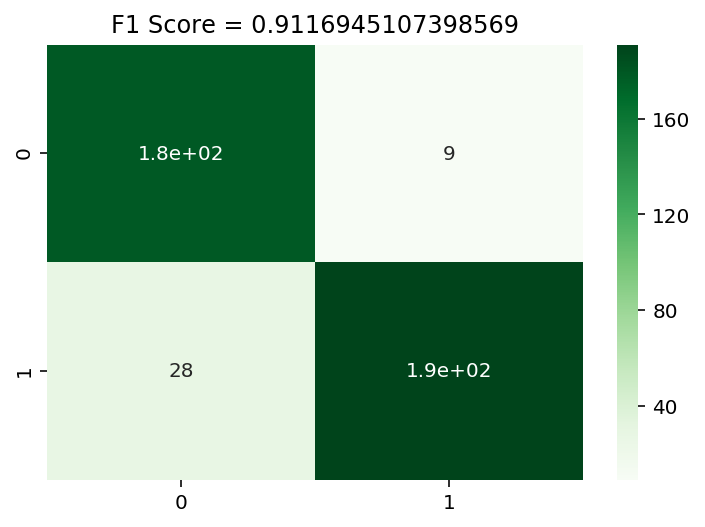

In [29]:
etc=ExtraTreesClassifier(n_estimators=342, n_jobs=-1, random_state=42)
score_etc= CrossVal(X_train,y_train,etc)
print('Accuracy is:',score_etc)
etc.fit(X_train,y_train)
plotting(y_test,etc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,etc.predict(X_test)), annot= True, cmap='Greens')

etc_f1=f1_score(y_test,etc.predict(X_test))
plt.title('F1 Score = {}'.format(etc_f1))

# Ada Boost Classifier

Accuracy is: 0.5316560107348646


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=SGDClassifier(alpha=0.2, average=False,
                                                class_weight=None,
                                                early_stopping=False,
                                                epsilon=0.1, eta0=0.0,
                                                fit_intercept=True,
                                                l1_ratio=0.15,
                                                learning_rate='optimal',
                                                loss='log', max_iter=1000,
                                                n_iter_no_change=5, n_jobs=None,
                                                penalty='l2', power_t=0.5,
                                                random_state=23, shuffle=True,
                                                tol=1e-10,
                                                validation_fraction=0.1,
                                

Text(0.5, 1.0, 'F1 Score = 0.6996805111821086')

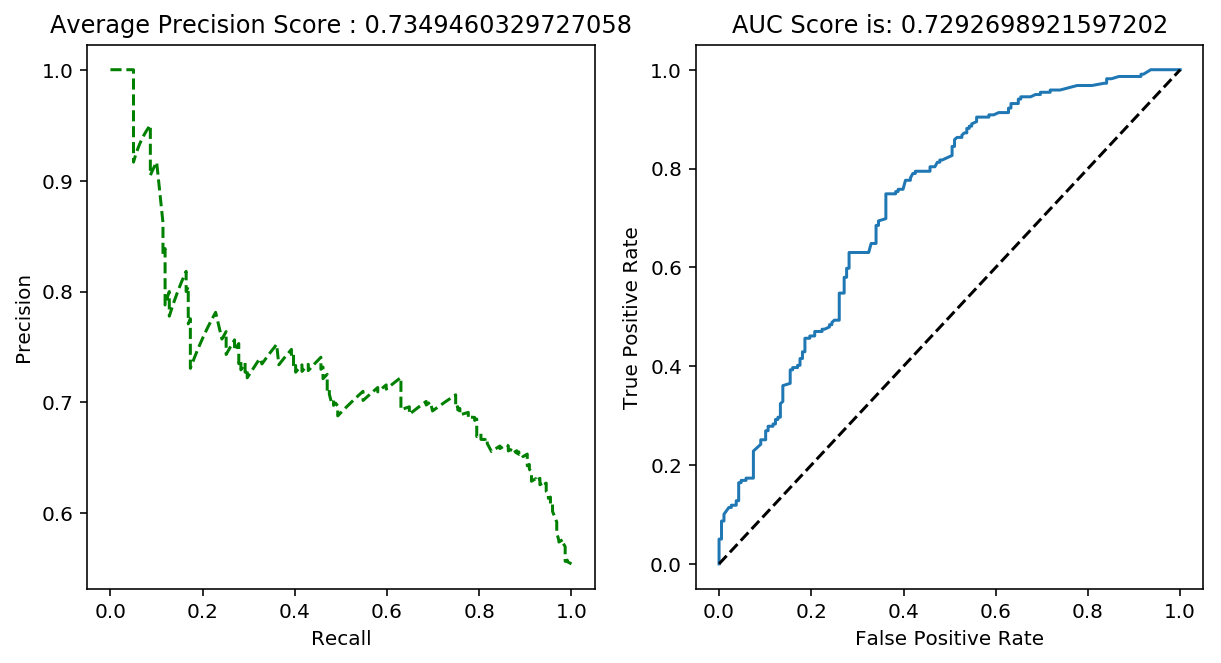

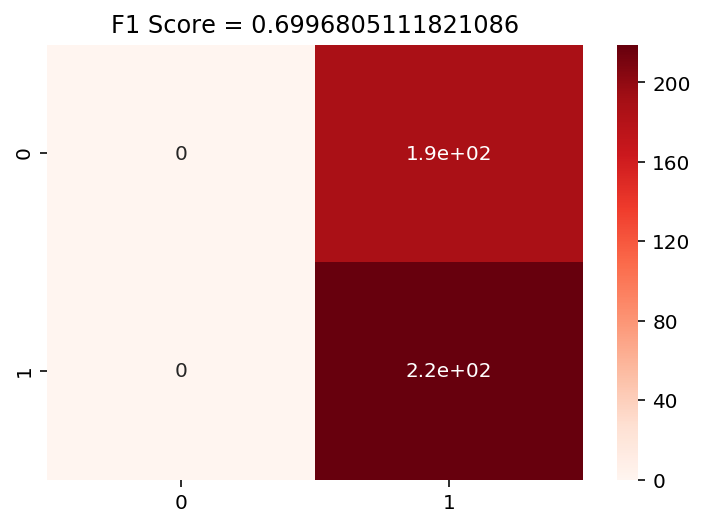

In [30]:
sgd=SGDClassifier(tol=1e-10,random_state=23,loss='log',penalty="l2",alpha=0.2)
score_sgd=CrossVal(X_train,y_train,sgd)

abc=AdaBoostClassifier(sgd,n_estimators=200, random_state=343, learning_rate=0.05)
score_ada= CrossVal(X_train,y_train,abc)
print('Accuracy is:',score_ada)
abc.fit(X_train,y_train)
plotting(y_test,abc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,abc.predict(X_test)), annot= True, cmap='Reds')

abc_f1=f1_score(y_test,abc.predict(X_test))
plt.title('F1 Score = {}'.format(abc_f1))

# Gradient Boosting Classifier

Accuracy is: 0.7418817586234114


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=420,
                           n_iter_no_change=None, presort='auto',
                           random_state=43, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Text(0.5, 1.0, 'F1 Score = 0.8')

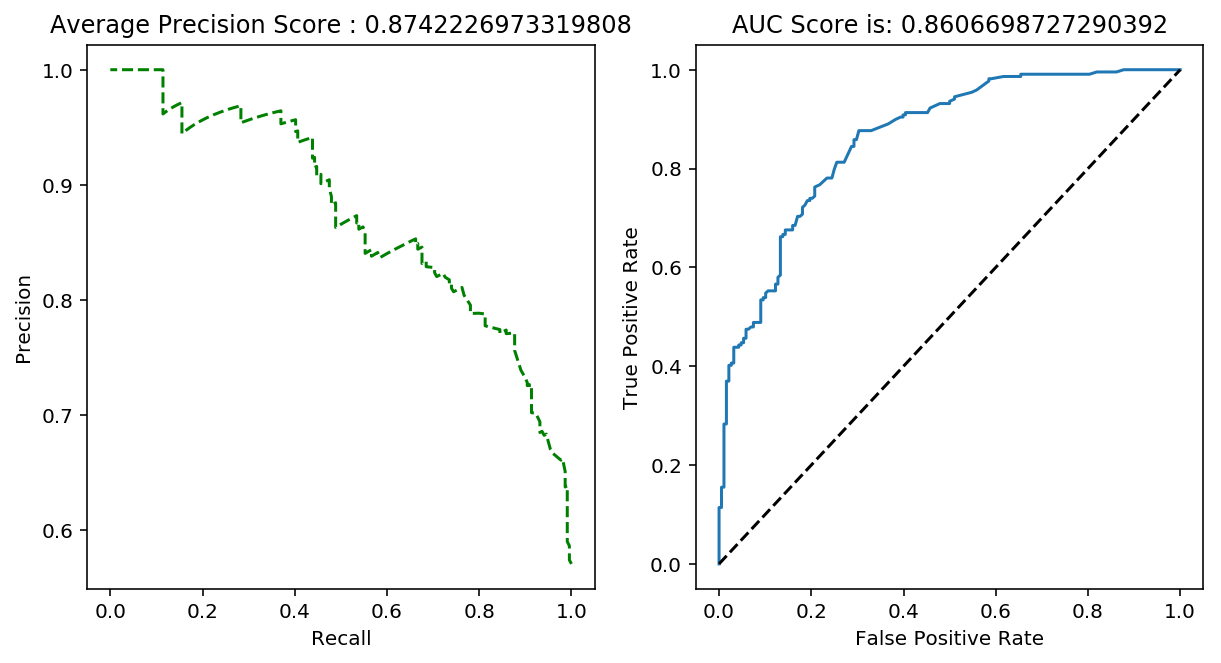

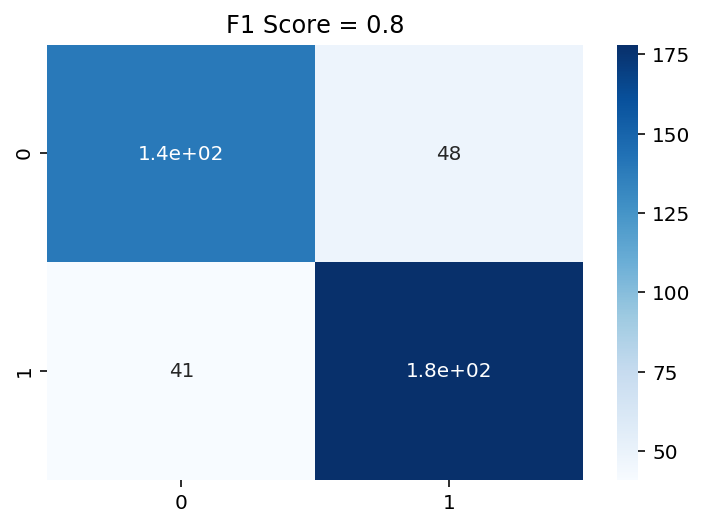

In [31]:
gbc=GradientBoostingClassifier(n_estimators=420, random_state=43, learning_rate = 0.01)
score_gbc= CrossVal(X_train,y_train,gbc)
print('Accuracy is:',score_gbc)
gbc.fit(X_train,y_train)
plotting(y_test,gbc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,gbc.predict(X_test)), annot= True, cmap='Blues')

gbc_f1=f1_score(y_test,gbc.predict(X_test))
plt.title('F1 Score = {}'.format(gbc_f1))

# Bagging Classifier

Accuracy is: 0.7418817586234114


BaggingClassifier(base_estimator=LogisticRegression(C=1.0,
                                                    class_weight='balanced',
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=1e-10,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=43, n_estimators=10, n_jobs=-1, 

Text(0.5, 1.0, 'F1 Score = 0.6511627906976744')

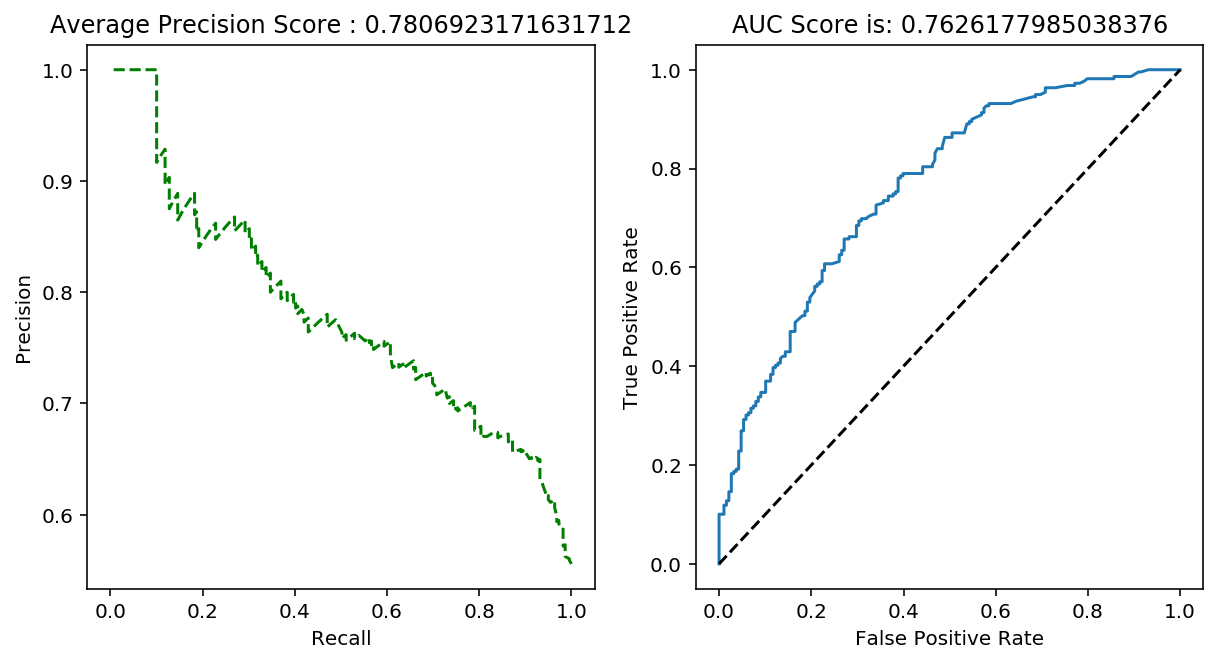

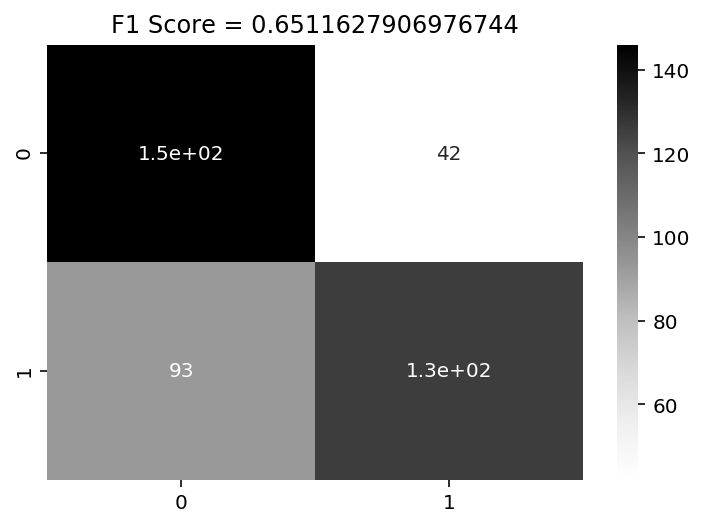

In [32]:
bc=BaggingClassifier(lr,max_samples=43, bootstrap=True, n_jobs= -1)
score_bc= CrossVal(X_train,y_train,gbc)
print('Accuracy is:',score_bc)
bc.fit(X_train,y_train)
plotting(y_test,bc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,bc.predict(X_test)), annot= True, cmap='Greys')

bc_f1=f1_score(y_test,bc.predict(X_test))
plt.title('F1 Score = {}'.format(bc_f1))

# Decision Tree Classifier

Accuracy is :  0.7110821690741179


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Text(0.5, 1.0, 'F1 Score = 0.8235294117647058')

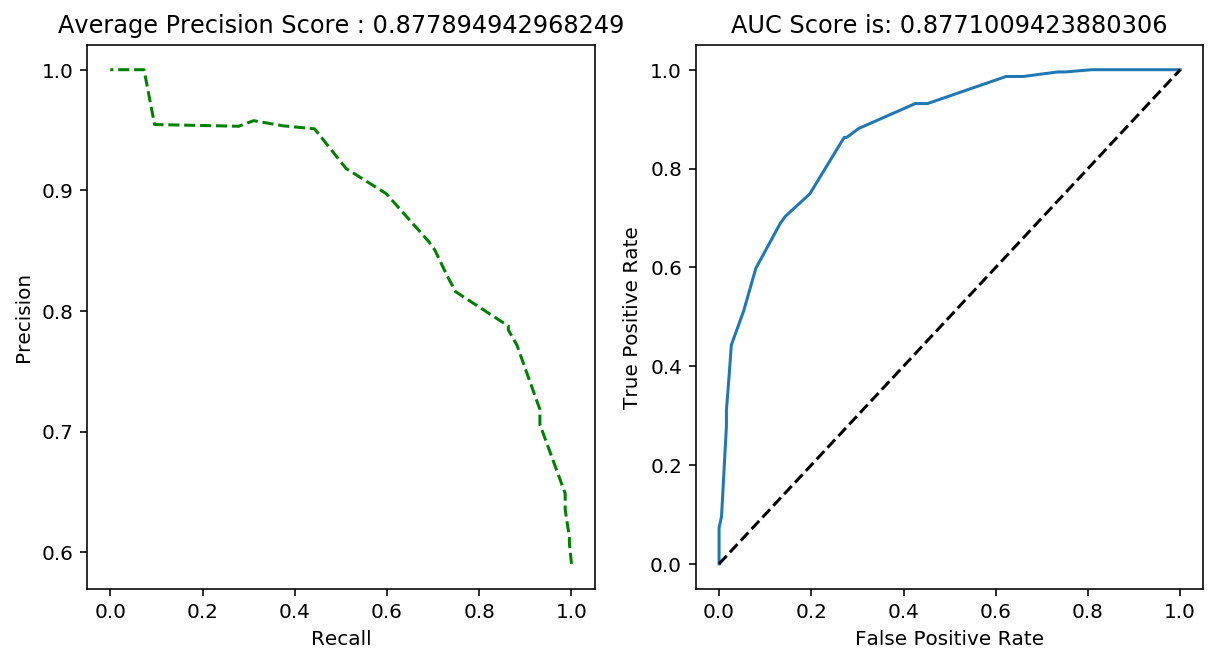

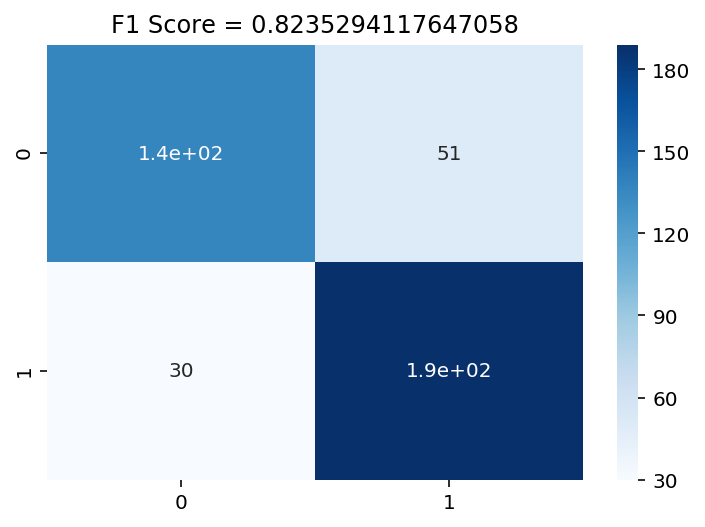

In [33]:
dtc=DecisionTreeClassifier(max_depth=6)
score_dtc=CrossVal(X_train,y_train,dtc)
print("Accuracy is : ",score_dtc)
dtc.fit(X_train,y_train)
plotting(y_test,dtc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,dtc.predict(X_test)), annot= True, cmap='Blues')

dtc_f1=f1_score(y_test,dtc.predict(X_test))
plt.title('F1 Score = {}'.format(dtc_f1))

# Important feature

Text(0.5, 1.0, 'Feature Importance')

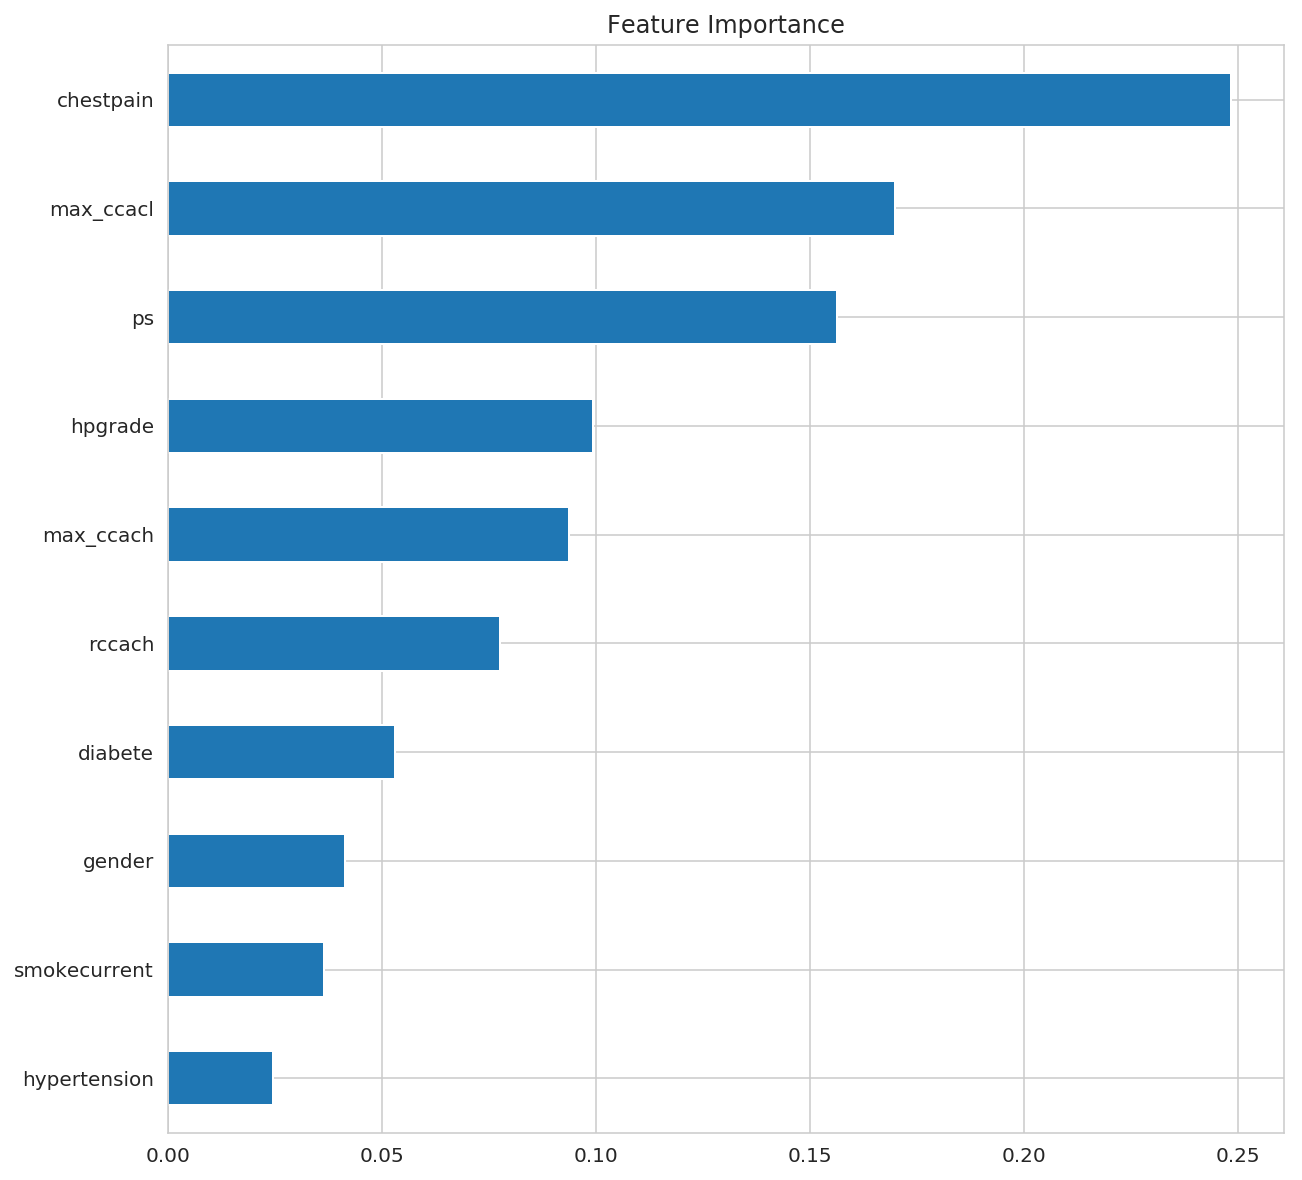

In [34]:
fig= plt.figure(figsize=(10,10))
important=pd.Series(rf.feature_importances_, index=X_train.columns)
sns.set_style('whitegrid')
important.sort_values().plot.barh()
plt.title('Feature Importance')

# Model accuracy plot**

Text(0.5, 1.0, 'Model Accracy')

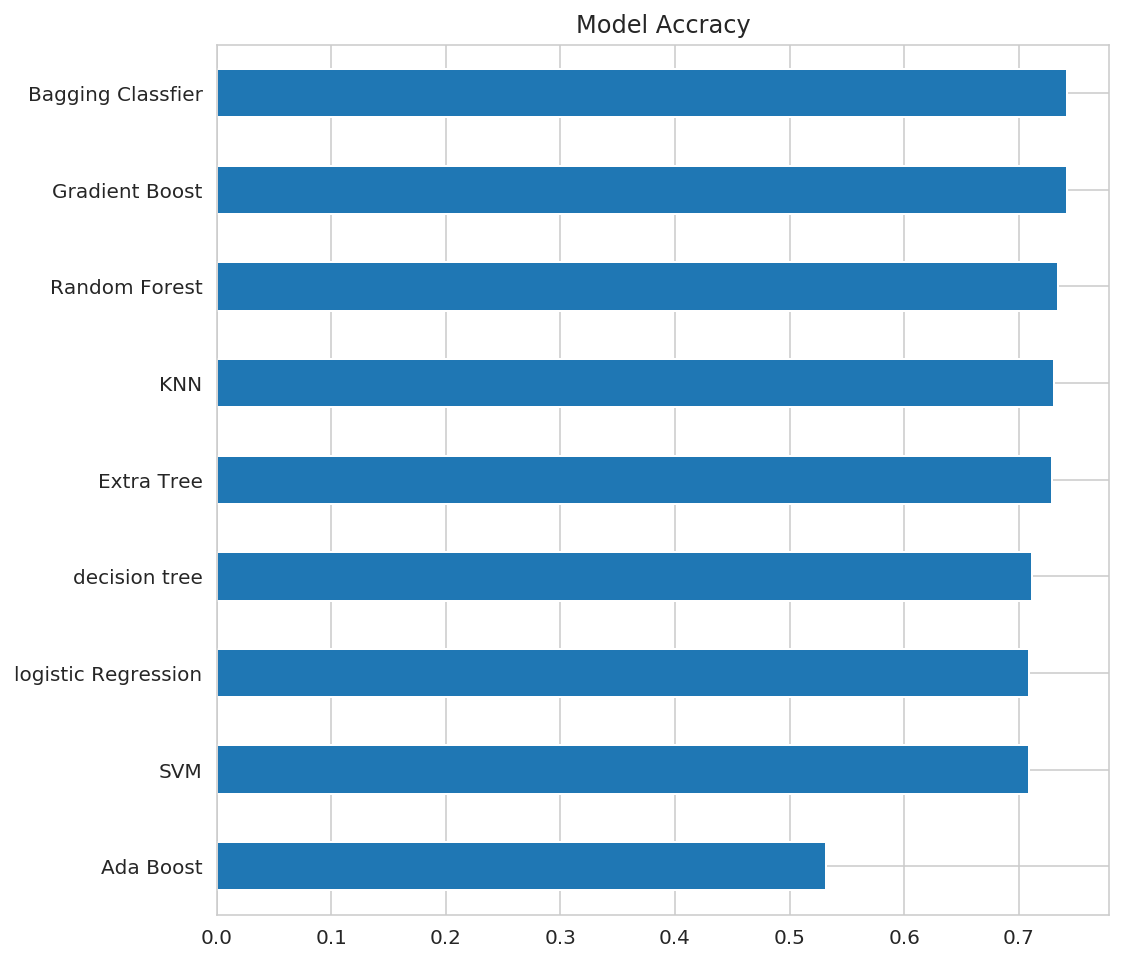

In [35]:
model_accuracy = pd.Series(data=[ score_k, score_lr, score_dtc, score_svc, score_rf, score_etc, 
                           score_ada, score_gbc, score_bc], 
                           index=['KNN','logistic Regression', 'decision tree','SVM', 'Random Forest',
                            'Extra Tree', 'Ada Boost' , 'Gradient Boost','Bagging Classfier'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

#  for Classification task ACCURACY is not important. Instead of accuracy model should be judged on basis of AUC (Area under curve), ROC CURVE, High Precision and High Recall values. F1 score also play imporant role which is equals to 2/(1/precision + 1/Recall) score

AS FURTHER COMPARISON BETWEEN MODEL PLOTTING F1 SCORE

Text(0.5, 1.0, 'Model F1 Score Comparison')

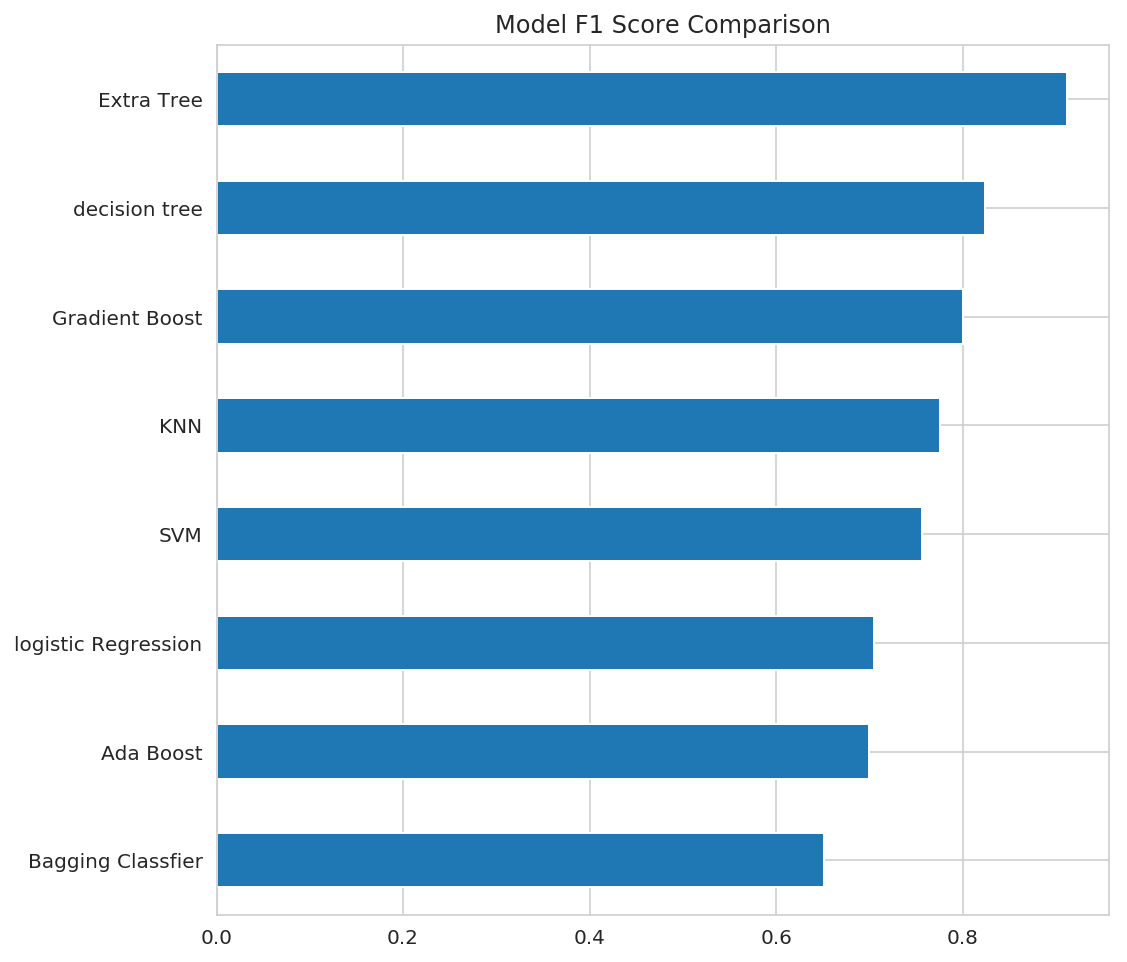

In [36]:
model_f1_score = pd.Series(data=[ k_f1, lr_f1, dtc_f1, svc_f1, etc_f1, 
                           abc_f1, gbc_f1, bc_f1], 
                           index=['KNN','logistic Regression','decision tree', 'SVM', 
                                'Extra Tree', 'Ada Boost' , 'Gradient Boost', 'Bagging Classfier'])
fig= plt.figure(figsize=(8,8))
model_f1_score.sort_values().plot.barh()
plt.title('Model F1 Score Comparison')

Accuracy is: 0.729710316520641


VotingClassifier(estimators=[('etc',
                              ExtraTreesClassifier(bootstrap=False,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=342, n_jobs=-1,
                                                   oob_score=False,
                   

Text(0.5, 1.0, 'F1 Score = 0.9137529137529138')

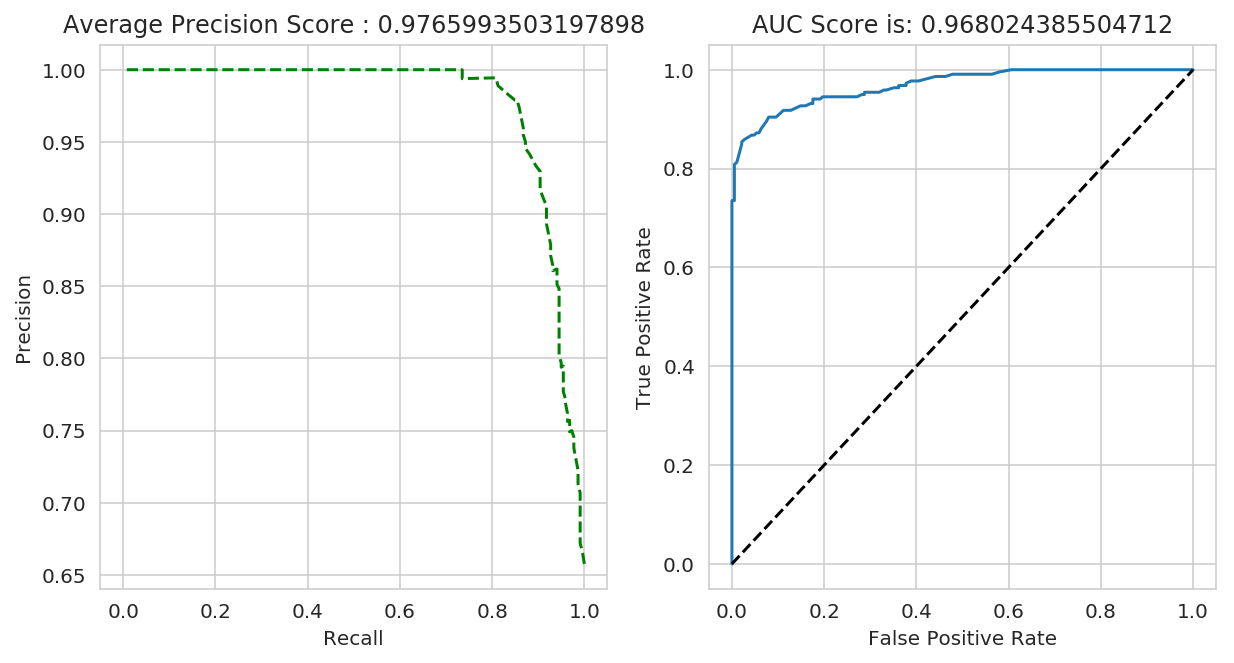

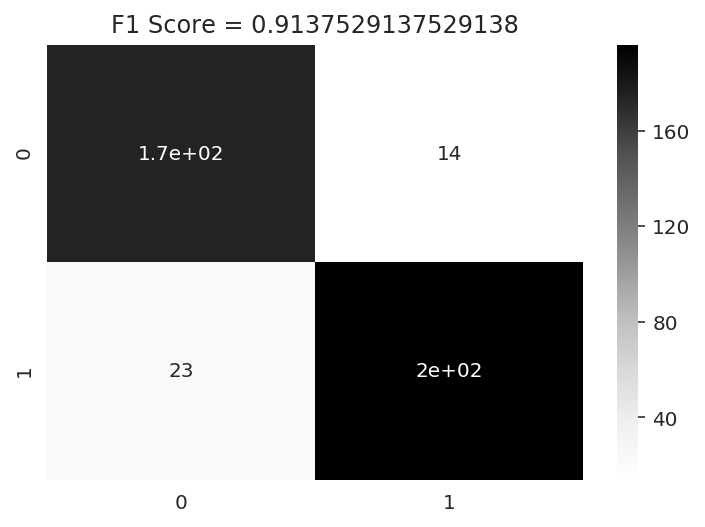

In [37]:
vc=VotingClassifier(estimators=[('etc',etc),('rf',rf),('dtc',dtc)],
                    voting='soft')
score_vc= CrossVal(X_train,y_train,vc)
print('Accuracy is:',score_vc)
vc.fit(X_train,y_train)
plotting(y_test,vc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,vc.predict(X_test)), annot= True, cmap='Greys')

vc_f1=f1_score(y_test,vc.predict(X_test))
plt.title('F1 Score = {}'.format(vc_f1))

> By combining svc + etc + rf we got 91.0 F1 score with 96 AUC
This is the power of ensembling. In this case Voting classifier is classifing instance based on Votes. For eg. Out of 3 classifier suppose if 2 classifier voting for postive class and other one is for negative class then Voting classifier will choose positive class for that instance.

MOST IMPORTANT NOTE HERE IS :Voting Classifier will perform better if all of the classifier which are choosen for voting are making different mistakes. So Voting Classifier will not make that mistake by choosing most voted class.

# 选择模型

In [38]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix

def evaluation(y_test,y_pred):
  acc=accuracy_score(y_test,y_pred)
  rcl=recall_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)
 

  metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               
              }

  return print(metric_dict)

#evaluation(Y_test,SVC_Y_pred)

k lr dtc svc etc abc gbc bc

In [39]:
print(" Best evaluation parameters achieved with k:") 
evaluation(y_test,k.predict(X_test))

print(" Best evaluation parameters achieved with lr:") 
evaluation(y_test,lr.predict(X_test))

print(" Best evaluation parameters achieved with dtc:") 
evaluation(y_test,dtc.predict(X_test))

print(" Best evaluation parameters achieved with svc:") 
evaluation(y_test,svc.predict(X_test))

print(" Best evaluation parameters achieved with etc:") 
evaluation(y_test,etc.predict(X_test))

print(" Best evaluation parameters achieved with abc:") 
evaluation(y_test,abc.predict(X_test))

print(" Best evaluation parameters achieved with gbc:") 
evaluation(y_test,gbc.predict(X_test))

print(" Best evaluation parameters achieved with bc:") 
evaluation(y_test,bc.predict(X_test))

 Best evaluation parameters achieved with k:
{'accuracy': 0.742, 'recall': 0.831, 'F1 score': 0.776}
 Best evaluation parameters achieved with lr:
{'accuracy': 0.7, 'recall': 0.667, 'F1 score': 0.705}
 Best evaluation parameters achieved with dtc:
{'accuracy': 0.801, 'recall': 0.863, 'F1 score': 0.824}
 Best evaluation parameters achieved with svc:
{'accuracy': 0.722, 'recall': 0.799, 'F1 score': 0.756}
 Best evaluation parameters achieved with etc:
{'accuracy': 0.909, 'recall': 0.872, 'F1 score': 0.912}
 Best evaluation parameters achieved with abc:
{'accuracy': 0.538, 'recall': 1.0, 'F1 score': 0.7}
 Best evaluation parameters achieved with gbc:
{'accuracy': 0.781, 'recall': 0.813, 'F1 score': 0.8}
 Best evaluation parameters achieved with bc:
{'accuracy': 0.668, 'recall': 0.575, 'F1 score': 0.651}


In [40]:
print(" Best evaluation parameters achieved with vc:") 
evaluation(y_test,vc.predict(X_test))

 Best evaluation parameters achieved with vc:
{'accuracy': 0.909, 'recall': 0.895, 'F1 score': 0.914}


# Stacking models

Now Sklearn also provide StackingClassifier() as well as StackingRegressor() under ensemble module. Update Sklearn to use those libraries

In [41]:
from sklearn.model_selection import StratifiedKFold
k=StratifiedKFold(n_splits= 5, shuffle=False, random_state=6)

In [42]:
def stacking(model, X_train, y_train, X_test, name):
    prediction_train = np.zeros(len(X_train))
    prediction_test = np.zeros((len(X_test)))
    for train_index, test_index in k.split(X_train,y_train):
        trainset, trainset_label =  X_train.iloc[train_index,:], y_train.iloc[train_index]
        cv_set, cv_label =  X_train.iloc[test_index,:], y_train.iloc[test_index]
        
        model.fit(trainset, trainset_label)
        prediction_train[test_index] = model.predict(cv_set)
        
    prediction_test = model.predict(X_test)
    return (pd.DataFrame({name:prediction_train}),pd.DataFrame({name:prediction_test}))    

In [43]:
# stacking  random forest, voting classifier
# sgd_train, sgd_test = stacking(sgd, X_train, y_train, X_test, 'sgd')
rf_train, rf_test = stacking(rf, X_train, y_train, X_test, 'random forest')
vc_train, vc_test = stacking(vc, X_train, y_train, X_test, 'voting') 

## 第四部分 Applying the model <a name="paragraph7"></a>

In [44]:
 def start_questionnaire():
    my_predictors = []
    parameters=['gender', 'hypertension', 'diabete', 'smokecurrent', 'hpgrade',
       'chestpain', 'rccach', 'max_ccach', 'max_ccacl', 'ps']
    
    print('Input Patient Information:')
    
    gender = input("Patient's gender. male=1,female=0: >>> ") 
    my_predictors.append(gender)
    hypertension = input("Patient is hypertension. yes=1, no=0: >>> ") 
    my_predictors.append(hypertension)
    hpgrade = input("Patient's  blood pressure level.normal=0,prehypertension=0.5,level1=1,level2=2,level3=3: >>> ") 
    my_predictors.append(hpgrade)
    smokecurrent = input("Patient's smoked current. yes=1,no=0: >>> ") 
    my_predictors.append(smokecurrent)
    diabetes = input("Did Patient have diabetes? Yes=1, No=0 >>> ") 
    my_predictors.append(diabetes)
    chestpain = input("Patient's chestpain level.normal=0,grade1=1,grade2=2,grade3=3: >>> ")
    my_predictors.append(chestpain)
    rccach = input("Patient's right carotid plaque height: >>> ") 
    my_predictors.append(rccach)
    max_ccach = input("Patient's double maxiture carotid plaque height >>> ") 
    my_predictors.append(max_ccach)
    max_ccacl=input("Patient's double maxiture carotid plaque length >>> ") 
    my_predictors.append(max_ccacl)
    ps=input("Patient's double carotid all plaque height addition >>> ") 
    my_predictors.append(ps)
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    scaler = MinMaxScaler(feature_range=(0,1)) 
   
    # assign scaler to column:
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    my_y_pred = vc.predict(my_df)
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient has not a Heart Disease.")
    if my_y_pred == 0:
        print("The patient has a Heart Disease.")
        
start_questionnaire()

Input Patient Information:


StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

# 网页

In [45]:
import pickle as pkl
pkl.dump(vc,open("cad_model.p","wb"))

In [46]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [47]:
from sklearn.externals import joblib


joblib.dump(vc, 'cadmodel.pkl')

/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['cadmodel.pkl']

In [48]:
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)

0.21.3


# Import streamlit,pyngrok, and ngrok modules

In [49]:
!pip install streamlit
!pip install pyngrok===3.1.1
from pyngrok import ngrok

  ERROR: Could not find a version that satisfies the requirement streamlit (from versions: none)
ERROR: No matching distribution found for streamlit
  ERROR: Could not find a version that satisfies the requirement pyngrok===3.1.1 (from versions: none)
ERROR: No matching distribution found for pyngrok===3.1.1


ModuleNotFoundError: No module named 'pyngrok'

In [50]:
%%writefile heart_app.py
import streamlit as st
import base64
import sklearn
import numpy as np
import pickle as pkl
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
#Load the saved model
model=pkl.load(open("cad_model.p","rb"))








st.set_page_config(page_title="Coronary Heart disease diagnosis App",page_icon="⚕️",layout="centered",initial_sidebar_state="expanded")



def preprocess(gender, hypertension, diabete, smokecurrent, hpgrade,chestpain, rccach, max_ccach, max_ccacl, ps ):   
 
    
    # Pre-processing user input   
    if gender=="male":
        gender=1 
    else: gender=0
    
    
    if chestpain=="Typical angina":
        chestpain=3
    elif chestpain=="Atypical angina":
        chestpain=2
    elif chestpain=="Non-anginal pain":
        chestpain=1
    elif chestpain=="Asymptomatic":
        chestpain=0
    
    if hypertension=="Yes":
        hypertension=1
    elif hypertension=="No":
        hypertension=0
        
    if hpgrade=="level 3":
        hpgrade=3
    elif hpgrade=="level 2":
        hpgrade=2
    elif hpgrade=="level 1":
        hpgrade=1
    elif hpgrade=="prehypertension":
        hpgrade=0.5
    elif hpgrade=="normal":
        hpgrade=0
        
    if diabete=="Yes":
        diabete=1
    elif diabete=="No":
        diabete=0
 
    if smokecurrent=="Yes":
        smokecurrent=1
    elif smokecurrent=="No":
        smokecurrent=0



    user_input=[gender, hypertension, diabete, smokecurrent, hpgrade,chestpain, rccach, max_ccach, max_ccacl, ps]
    user_input=np.array(user_input)
    user_input=user_input.reshape(1,-1)
    user_input=scal.fit_transform(user_input)
    prediction = model.predict(user_input)

    return prediction

    

       
    # front end elements of the web page 
html_temp = """ 
    <div style ="background-color:pink;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Coronary Heart disease diagnosis App</h1> 
    </div> 
    """
      
# display the front end aspect
st.markdown(html_temp, unsafe_allow_html = True) 
st.subheader('by Bao xin ')


# following lines create boxes in which user can enter data required to make prediction

gender = st.radio("Select Gender: ", ('male', 'female'))
chestpain = st.selectbox('Chest Pain Type',("Typical angina","Atypical angina","Non-anginal pain","Asymptomatic")) 
hypertension=st.selectbox('hypertension',['Yes','No'])
hpgrade = st.selectbox('hygrade',("level 3","level 2","level 1","prehypertension","normal")) 
diabete=st.selectbox('diabete',['Yes','No'])
smokecurrent=st.selectbox('smokecurrent',['Yes','No'])
max_ccach=st.number_input('The maximum double carotid plaque height')
max_ccacl=st.number_input('The maximum double carotid plaque length')
rccach=st.number_input('right carotid plaque height')
ps=st.number_input('The addition of double carotid plaque height')



#user_input=preprocess(sex,cp,exang, fbs, slope, thal )
pred=preprocess(gender, hypertension, diabete, smokecurrent, hpgrade,chestpain, rccach, max_ccach, max_ccacl, ps)




if st.button("Predict"):    
  if pred[0] == 0:
    st.error('Warning! You have high risk of getting a heart attack!')
    
  else:
    st.success('You have lower risk of getting a heart disease!')
    
   



st.sidebar.subheader("About App")

st.sidebar.info("This web app is helps you to find out whether you are at a risk of a coronary heart disease.")
st.sidebar.info("Enter the required fields and click on the 'Predict' button to check whether you have a heart disease")
st.sidebar.info("Don't forget to rate this app")



feedback = st.sidebar.slider('How much would you rate this app?',min_value=0,max_value=5,step=1)

if feedback:
  st.header("Thank you for rating the app!")
  st.info("Caution: This is just a prediction and not doctoral advice. Kindly see a doctor if you feel the symptoms persist.") 


    
    
    
    
    
    
    
    

Writing heart_app.py


In [51]:
!nohup streamlit run d:\python39\lib\site-packages\ipykernel_launcher.py & 
url = ngrok.connect(port='6501')
url

OSError: Background processes not supported.